Paquetes necesarios:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Cargar imagen del drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Tarea realizada en clase:* Mostrar el grafico de respuesta de canny por filas


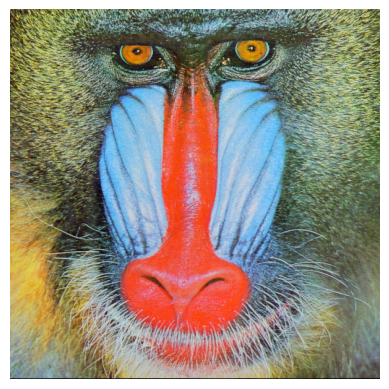

In [ ]:
#Lee imagen de archivo
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/mandril.jpg')

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb)
plt.show()

Preparación de la imagen:

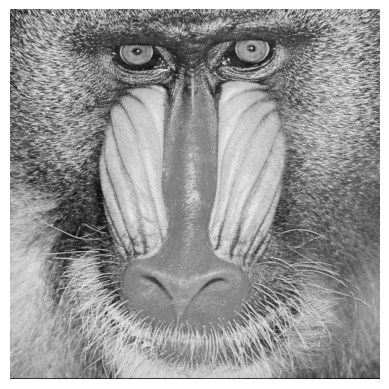

In [ ]:
# Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Muestra, indicando el mapa de color de grises
# Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')
plt.show()

Aplicamos Canny:

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


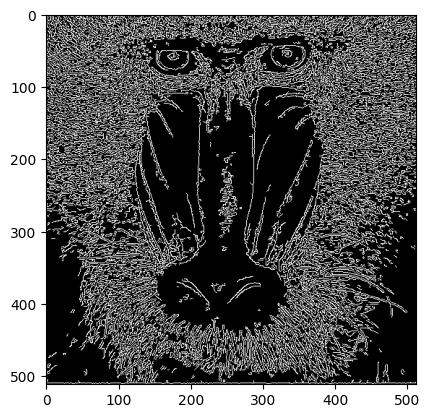

In [ ]:
# Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
# Muestra resultado
plt.imshow(canny, cmap='gray')
plt.show()


Mostramos la gráfica comparativa por filas:

(0.0, 512.0)

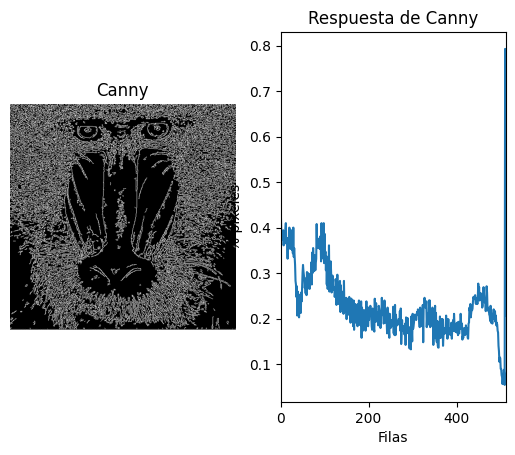

In [ ]:
# Cuenta el número de píxeles blancos (255) por filas
# Suma los valores de los pixeles por filas
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de filas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por filas
rows = row_counts[:] / (255 * canny.shape[1])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

*TAREA 2:* Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo

In [ ]:
# Suma los valores de los pixeles por fila
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Calcula el valor máximo en columnas
max_cols = max(col_counts[0])

# Calcula el valor máximo en filas
max_rows = max(row_counts[:])[0]

# Mostramos los pixeles blancos por filas y se aprovecha el
#bucle para contar cuantos valores superan el umbral por filas
count_rows=0
print("Pixeles blancos por filas:")
for index,item in enumerate(row_counts):
  print("Fila", index+1, "\b:", item[0])
  if item[0] >= 0.95*max_rows:
    count_rows +=1

# Cuenta cuantos valores supern el umbral
white_col = [item for item in col_counts[0] if item >= 0.95*max_cols]

# Prints con los resultados
print("Máximo columnas:", max_cols)
print("Máximo filas:", max_rows)
print("Filas que superan el umbral:", count_rows)
print("Columnas que superan el umbral:", len(white_col))



Pixeles blancos por filas:
Máximo columnas: 48705
Máximo filas: 103530
Filas que superan el umbral: 1
Columnas que superan el umbral: 8


TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

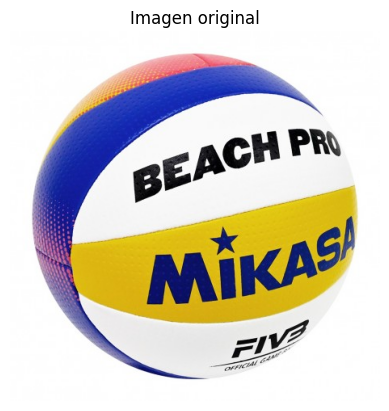

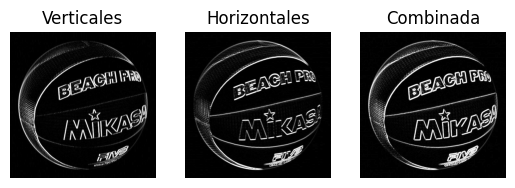

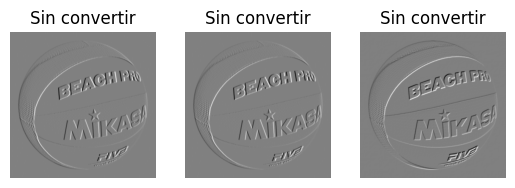

In [ ]:
#Lee imagen de archivo
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/balon.jpg')

# Muestra imagen original
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Imagen original')
plt.axis("off")
plt.imshow(img_rgb)
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original
img_suavizada = cv2.GaussianBlur(img, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(img_suavizada, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(img_suavizada, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Verticales
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')

#Horizontales
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')

#Combinada
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray')

#Mostrar
plt.show()

#/////Sin convertir escala

#Verticales
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Sin convertir')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

#Horizontales
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Sin convertir')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobelx, cmap='gray') #Sin convertir escala

#Combinadas
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Sin convertir')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

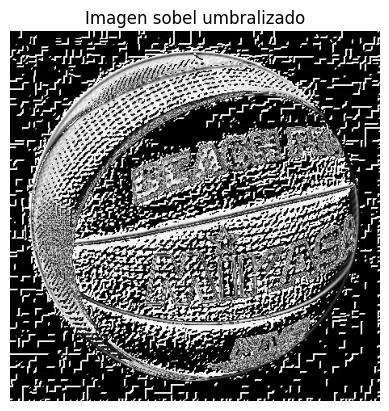

Máximo por fila: 59398
Máximo por columnas: 69284
Columnas por encima del umbral: [31, 32, 255]
Filas por encima del umbral: [250, 251, 254, 255, 257]


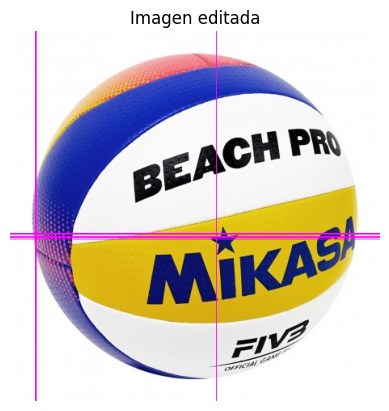

In [ ]:
sobel8 = np.uint8(sobel)
plt.title('Imagen sobel umbralizado')
plt.axis("off")
plt.imshow(cv2.convertScaleAbs(sobel8), cmap='gray')
plt.show()

#Calcula en ambas direcciones (horizontal y vertical)
sobel8x = np.uint8(sobelx)
sobel8y = np.uint8(sobely)

# Calcula el valor máximo en columnas
max_cols = max([sum(columna) for columna in sobel8y])
# Calcula el valor máximo en filas
max_rows = max([sum(fila) for fila in sobel8x])

print("Máximo por fila:",max_rows)
print("Máximo por columnas:",max_cols)

index_cols = [index for index,columna in enumerate(sobel8y) if sum(columna) > 0.95*max_cols]
index_rows = [index for index,fila in enumerate(sobel8x) if sum(fila) > 0.95*max_rows]



print("Columnas por encima del umbral:", index_cols)
print("Filas por encima del umbral:", index_rows)

#Lee imagen de archivo
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/balon.jpg')

img_editar = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for index_fila,fila in enumerate(img_editar):
  for index_columna,pixel in enumerate(fila):
    if index_fila in index_rows or index_columna in index_cols:
      img_editar[index_fila][index_columna]=[255,0,255]


# Muestra imagen
plt.title('Imagen editada')
plt.axis("off")
plt.imshow(img_editar)
plt.show()

TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?



Un comportamiento muy interesante para mostrar, es aquel en el que se modifican los colores de los pixeles de las imagenes tomadas por la webcam. Este es muy instructivo sirve para entender la estructura de una imagen, con sus pixeles y mapas de colores y la toma de imagenes en tiempo real.


TAREA: Tras ver los vídeos My little piece of privacy, Messa di voce y Virtual air guitar propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [ ]:
vid = cv2.VideoCapture(0)
img = cv2.imread('emoji.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def calculateMax(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Gaussiana para suavizar la imagen original
    img_suavizada = cv2.GaussianBlur(img, (3, 3), 0)

    #Calcula en ambas direcciones (horizontal y vertical)
    sobelx = cv2.Sobel(img_suavizada, cv2.CV_64F, 1, 0)  # x
    sobely = cv2.Sobel(img_suavizada, cv2.CV_64F, 0, 1)  # y

    #Calcula en ambas direcciones (horizontal y vertical)
    sobel8x = np.uint8(sobelx)
    sobel8y = np.uint8(sobely)

    # Calcula el valor máximo en columnas
    colum_values = [sum(columna) for columna in sobel8y]
    max_cols = colum_values.index(max(colum_values))
    # Calcula el valor máximo en filas
    rows_values = [sum(fila) for fila in sobel8x]
    max_rows = rows_values.index(max(rows_values))

    return (max_rows,max_cols)

def drawFace(frame, coords):
    # Ojo izquierdo
    cv2.circle(frame,(coords[0]+75,coords[1]+50), 15, (255,255,255), -1)
    cv2.circle(frame,(coords[0]+75,coords[1]+50), 10, (0,0,255), -1)
    cv2.circle(frame,(coords[0]+75,coords[1]+50), 5, (0,0,0), -1)

    # Ojo derecho
    cv2.circle(frame,(coords[0]+125,coords[1]+50), 15, (255,255,255), -1)
    cv2.circle(frame,(coords[0]+125,coords[1]+50), 10, (0,0,255), -1)
    cv2.circle(frame,(coords[0]+125,coords[1]+50), 5, (0,0,0), -1)

    # Boca
    cv2.ellipse(frame,(coords[0]+100,coords[1]+100),(50,50),0,0,180,255,-1)

    return frame



#Marca de inicio
disponible = 0
while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            # Muestra resultado

            coords = calculateMax(frame)
            mod_frame = drawFace(frame, coords)
            cv2.imshow('Frame', mod_frame)

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(80) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()